## Decision Tree Exercises

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

from acquire import get_titanic_data
from acquire import get_telco_data
from prepare import prep_telco
from prepare import prep_titanic

##### 1. Using the titanic data, in your classification-exercises repository, create a notebook, model.ipynb where you will do the following:

- What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

- Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

- Evaluate your in-sample results using the model score, confusion matrix, and classification report.

- Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

- Run through steps 2-4 using a different max_depth value.

- Which model performs better on your in-sample data?

- Which model performs best on your out-of-sample data, the validate set?



In [2]:
#get the titanic dataset
df = get_titanic_data()
df.head()

Reading from csv file...


,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [3]:
#basic clean for the titanic dataset
df = df.drop(columns=['passenger_id', 'class', 'embarked', 'deck', 'age'])
dum_df = pd.get_dummies(df[['sex', 'embark_town']], drop_first = [True, True])
df = pd.concat([df, dum_df], axis = 1)
df.head()

,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,3,male,1,0,7.2500,Southampton,0,1,0,1
1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0
2,1,3,female,0,0,7.9250,Southampton,1,0,0,1
3,1,1,female,1,0,53.1000,Southampton,0,0,0,1
4,0,3,male,0,0,8.0500,Southampton,1,1,0,1


In [4]:
#split the data
train, test = train_test_split(df, train_size = 0.8, stratify = df.survived, random_state=123)
train, validate = train_test_split(train, train_size = 0.7, stratify = train.survived, random_state=123)
#verify the data split
train.shape, validate.shape, test.shape

((498, 11), (214, 11), (179, 11))

---

##### Decision tree models 1 & 2 with two features for x variable - Titanic dataset

In [5]:
#split the train set for x and y
x_train = train[['pclass', 'sex_male']]
y_train = train[['survived']]
x_train.head()

,pclass,sex_male
583,1,1
165,3,1
50,3,1
259,2,0
306,1,0


In [6]:
y_train.head()

,survived
583,0
165,1
50,0
259,1
306,1


In [7]:
#check which is the most common y value for baseline
y_train.value_counts()

survived
0           307
1           191
dtype: int64

In [8]:
#create the baseline column based on the most frequent occurring 'survived' value
y_train['baseline'] = 0
y_train.head()

,survived,baseline
583,0,0
165,1,0
50,0,0
259,1,0
306,1,0


In [9]:
#evaluate the baseline value
baseline_eval = accuracy_score(y_train.survived, y_train.baseline)
baseline_eval

0.6164658634538153

In [10]:
#create the decision tree classifier object
tree = DecisionTreeClassifier(max_depth=3)

In [11]:
#train/fit the decision tree object
tree.fit(x_train, y_train.survived)

DecisionTreeClassifier(max_depth=3)

In [12]:
#print the decision tree's structure and cutoff values
print(export_text(tree, feature_names=x_train.columns.tolist()))

|--- sex_male <= 0.50
|   |--- pclass <= 2.50
|   |   |--- pclass <= 1.50
|   |   |   |--- class: 1
|   |   |--- pclass >  1.50
|   |   |   |--- class: 1
|   |--- pclass >  2.50
|   |   |--- class: 1
|--- sex_male >  0.50
|   |--- pclass <= 1.50
|   |   |--- class: 0
|   |--- pclass >  1.50
|   |   |--- pclass <= 2.50
|   |   |   |--- class: 0
|   |   |--- pclass >  2.50
|   |   |   |--- class: 0



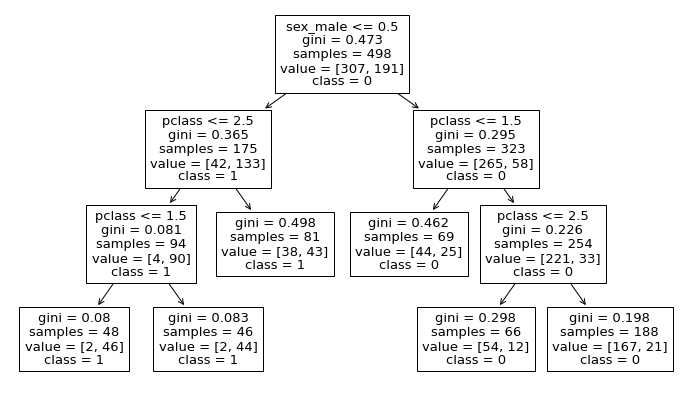

In [13]:
#visualize the decision tree
plt.figure(figsize=(12, 7))
plot_tree(tree, feature_names=x_train.columns, class_names=y_train.survived.astype(str))
plt.show()

In [14]:
#make predicions
y_pred = tree.predict(x_train)
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [15]:
#estimate probability
y_pred_prob = tree.predict_proba(x_train)
y_pred_prob[0:5]

array([[0.63768116, 0.36231884],
       [0.88829787, 0.11170213],
       [0.88829787, 0.11170213],
       [0.04347826, 0.95652174],
       [0.04166667, 0.95833333]])

In [16]:
#evaluate the model with a confusion matrix
labels = sorted(y_train.survived.unique())

pd.DataFrame(confusion_matrix(y_train.survived, y_pred), index=labels, columns=labels)

,0,1
0,265,42
1,58,133


In [17]:
#print the classification report
print(classification_report(y_train.survived, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       307
           1       0.76      0.70      0.73       191

    accuracy                           0.80       498
   macro avg       0.79      0.78      0.78       498
weighted avg       0.80      0.80      0.80       498



In [18]:
#set validate variables
x_validate = validate[['pclass', 'sex_male']]
y_validate = validate[['survived']]
x_validate.head()

,pclass,sex_male
610,3,0
424,3,1
568,3,1
334,1,0
101,3,1


In [19]:
#decision tree model 1 train score
tree.score(x_train, y_train.survived)

0.7991967871485943

In [20]:
#decision tree model 1 validate score
tree.score(x_validate, y_validate)

0.7616822429906542

### Decision Tree Model 1 (max depth = 3) evaluation calculations
**Positive** = survived

- True positives: 133
- True negatives: 265
- False positives: 58
- False negatives: 42
- Model Accuracy: 80%
- Model precision: 76%
- Model recall: 70%
- Model f1: 73%
- Model support: 191

In [21]:
#create the decision tree classifier object with a different max depth 
tree = DecisionTreeClassifier(max_depth=1)

In [22]:
#train/fit the decision tree object
tree.fit(x_train, y_train.survived)

DecisionTreeClassifier(max_depth=1)

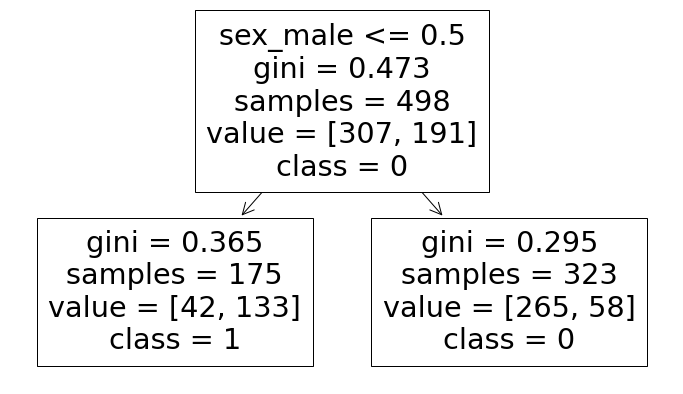

In [23]:
#visualize the decision tree
plt.figure(figsize=(12, 7))
plot_tree(tree, feature_names=x_train.columns, class_names=y_train.survived.astype(str))
plt.show()

In [24]:
#make predicions
y_pred = tree.predict(x_train)
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [25]:
#evaluate the model with a confusion matrix
labels = sorted(y_train.survived.unique())

pd.DataFrame(confusion_matrix(y_train.survived, y_pred), index=labels, columns=labels)

,0,1
0,265,42
1,58,133


In [26]:
#print the classification report
print(classification_report(y_train.survived, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       307
           1       0.76      0.70      0.73       191

    accuracy                           0.80       498
   macro avg       0.79      0.78      0.78       498
weighted avg       0.80      0.80      0.80       498



In [28]:
#model 2 - train score
tree.score(x_train, y_train.survived)

0.7991967871485943

In [29]:
#set validate variables
x_validate = validate[['pclass', 'sex_male']]
y_validate = validate[['survived']]
x_validate.head()

,pclass,sex_male
610,3,0
424,3,1
568,3,1
334,1,0
101,3,1


In [30]:
#model 2 validate score
tree.score(x_validate, y_validate)

0.7616822429906542

##### Model comparison:
- The two models performed the same on the train data despite the change in the max depth (1 and 3 )
- I also looked at a decision tree with a max dept of 8 but it only went to a depth of 3 because of the limited input features


---

##### Decision tree model 3 with 5 features for x variable - Titanic dataset

In [5]:
#split the train set for x and y
x_train = train[['pclass', 'sex_male', 'embark_town_Queenstown', 'embark_town_Southampton', 'alone']]
y_train = train[['survived']]
x_train.head()

,pclass,sex_male,embark_town_Queenstown,embark_town_Southampton,alone
583,1,1,0,0,1
165,3,1,0,1,0
50,3,1,0,1,0
259,2,0,0,1,0
306,1,0,0,0,1


In [6]:
y_train.head()

,survived
583,0
165,1
50,0
259,1
306,1


In [7]:
#create the decision tree classifier object
tree = DecisionTreeClassifier(max_depth=3)

In [8]:
#train/fit the decision tree object
tree.fit(x_train, y_train.survived)

DecisionTreeClassifier(max_depth=3)

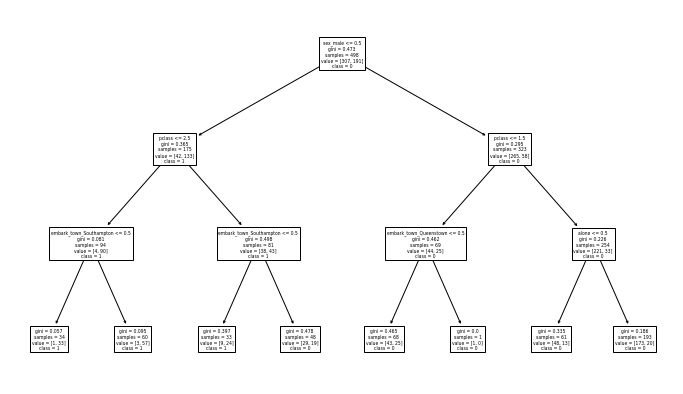

In [9]:
#visualize the decision tree
plt.figure(figsize=(12, 7))
plot_tree(tree, feature_names=x_train.columns, class_names=y_train.survived.astype(str))
plt.show()

In [10]:
#model 3 - train score
tree.score(x_train, y_train.survived)

0.8192771084337349

In [12]:
#make predicions
y_pred = tree.predict(x_train)
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [13]:
#evaluate the model with a confusion matrix
labels = sorted(y_train.survived.unique())

pd.DataFrame(confusion_matrix(y_train.survived, y_pred), index=labels, columns=labels)

,0,1
0,294,13
1,77,114


In [14]:
#print the classification report
print(classification_report(y_train.survived, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87       307
           1       0.90      0.60      0.72       191

    accuracy                           0.82       498
   macro avg       0.85      0.78      0.79       498
weighted avg       0.83      0.82      0.81       498



##### Decision Tree Model 3 (max depth = 3) evaluation calculations
Positive = survived

- True positives: 114
- True negatives: 294
- False positives: 77
- False negatives: 13
- Model Accuracy: 82%
- Model precision: 90%
- Model recall: 60%
- Model f1: 72%
- Model support: 191

---

### 2. Work through these same exercises using the Telco dataset

In [2]:
df = get_telco_data()
df.head()

Reading from csv file...


,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [3]:
df = prep_telco(df)
df.head()

,senior_citizen,tenure,monthly_charges,total_charges,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,multiple_lines_Yes,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0,9,65.6,593.30,0,1,1,1,0,0,...,0,1,0,1,0,0,0,0,0,1
1,0,9,59.9,542.40,1,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
2,0,4,73.9,280.85,1,0,0,1,0,0,...,0,1,1,0,0,1,0,0,1,0
3,1,13,98.0,1237.85,1,1,0,1,0,0,...,1,1,1,0,0,1,0,0,1,0
4,1,3,83.9,267.40,0,1,0,1,0,0,...,0,1,1,0,0,1,0,0,0,1


In [4]:
#split the data
train, test = train_test_split(df, train_size = 0.8, stratify = df.churn_Yes, random_state=123)
train, validate = train_test_split(train, train_size = 0.7, stratify = train.churn_Yes, random_state=123)
#verify the data split
train.shape, validate.shape, test.shape

((3943, 31), (1691, 31), (1409, 31))

---

##### Telco dataset model 1

In [11]:
#split train for x and y
x_train = train[['senior_citizen', 'gender_Male', 'partner_Yes', 'dependents_Yes']]
x_train.head()

,senior_citizen,gender_Male,partner_Yes,dependents_Yes
5310,1,0,1,0
3790,1,1,1,0
4398,1,0,1,0
2635,0,1,0,0
2986,0,1,1,0


In [26]:
y_train = train[['churn_Yes']]
y_train.head()

,churn_Yes
5310,0
3790,0
4398,0
2635,0
2986,0


In [9]:
#create the decision tree classifier object
tree = DecisionTreeClassifier(max_depth=5)

In [12]:
#train/fit the decision tree object
tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

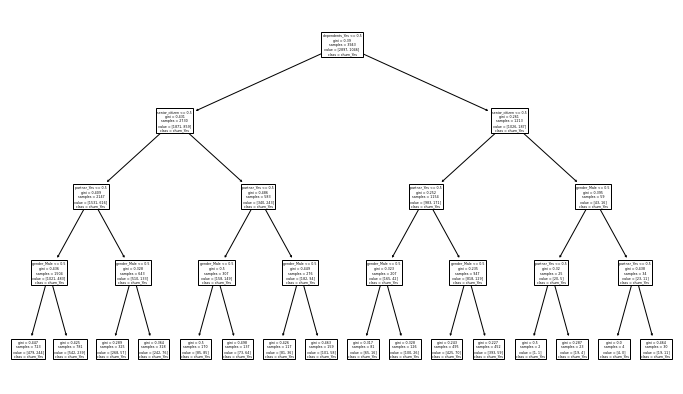

In [14]:
#visualize the decision tree
plt.figure(figsize=(12, 7))
plot_tree(tree, feature_names=x_train.columns, class_names=y_train.columns)
plt.show()

In [15]:
tree.score(x_train, y_train)

0.7347197565305605

In [16]:
#make predicions
y_pred = tree.predict(x_train)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [24]:
#print the classification report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85      2897
           1       0.00      0.00      0.00      1046

    accuracy                           0.73      3943
   macro avg       0.37      0.50      0.42      3943
weighted avg       0.54      0.73      0.62      3943



In [22]:
#evaluate the model with a confusion matrix
confusion_matrix(y_train, y_pred)

array([[2897,    0],
       [1046,    0]])

---

##### Telco dataset model 2

In [10]:
#split train for x and y
x_train = train.drop(columns=['churn_Yes', 'monthly_charges', 'total_charges', 'tenure'])
x_train.head()

,senior_citizen,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,...,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5310,1,0,1,0,1,0,1,0,1,0,...,0,1,1,0,1,0,0,0,0,0
3790,1,1,1,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4398,1,0,1,0,1,0,1,0,0,0,...,0,1,0,1,0,1,0,0,1,0
2635,0,1,0,0,0,1,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
2986,0,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [11]:
y_train = train[['churn_Yes']]
y_train.head()

,churn_Yes
5310,0
3790,0
4398,0
2635,0
2986,0


In [16]:
#create the decision tree classifier object
tree = DecisionTreeClassifier(max_depth=3)

In [17]:
#train/fit the decision tree object
tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [19]:
#visualize the decision tree
#plt.figure(figsize=(12, 7))
#plot_tree(tree, feature_names=x_train.columns, class_names=y_train.columns)
#plt.show()

In [20]:
tree.score(x_train, y_train)

0.7593203144813594

In [21]:
#make predicions
y_pred = tree.predict(x_train)
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=uint8)

In [22]:
#print the classification report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      2897
           1       0.54      0.62      0.58      1046

    accuracy                           0.76      3943
   macro avg       0.70      0.71      0.70      3943
weighted avg       0.77      0.76      0.76      3943



In [23]:
#evaluate the model with a confusion matrix
confusion_matrix(y_train, y_pred)

array([[2349,  548],
       [ 401,  645]])

---

##### Telco dataset model 3

In [5]:
df.columns

Index(['senior_citizen', 'tenure', 'monthly_charges', 'total_charges',
       'gender_Male', 'partner_Yes', 'dependents_Yes', 'phone_service_Yes',
       'multiple_lines_No phone service', 'multiple_lines_Yes',
       'online_security_No internet service', 'online_security_Yes',
       'online_backup_No internet service', 'online_backup_Yes',
       'device_protection_No internet service', 'device_protection_Yes',
       'tech_support_No internet service', 'tech_support_Yes',
       'streaming_tv_No internet service', 'streaming_tv_Yes',
       'streaming_movies_No internet service', 'streaming_movies_Yes',
       'paperless_billing_Yes', 'churn_Yes', 'contract_type_One year',
       'contract_type_Two year', 'internet_service_type_Fiber optic',
       'internet_service_type_None', 'payment_type_Credit card (automatic)',
       'payment_type_Electronic check', 'payment_type_Mailed check'],
      dtype='object')

In [9]:
train = df.rename(columns={'payment_type_Credit card (automatic)':'pay_credit', 'payment_type_Electronic check': 'pay_elec', 'payment_type_Mailed check': 'pay_mail'})

In [10]:
train.head()

,senior_citizen,tenure,monthly_charges,total_charges,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,multiple_lines_Yes,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,pay_credit,pay_elec,pay_mail
0,0,9,65.6,593.30,0,1,1,1,0,0,...,0,1,0,1,0,0,0,0,0,1
1,0,9,59.9,542.40,1,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
2,0,4,73.9,280.85,1,0,0,1,0,0,...,0,1,1,0,0,1,0,0,1,0
3,1,13,98.0,1237.85,1,1,0,1,0,0,...,1,1,1,0,0,1,0,0,1,0
4,1,3,83.9,267.40,0,1,0,1,0,0,...,0,1,1,0,0,1,0,0,0,1


In [11]:
#split train for x and y
x_train = train[['pay_credit', 'pay_elec', 'pay_mail']]
x_train.head()

,pay_credit,pay_elec,pay_mail
0,0,0,1
1,0,0,1
2,0,1,0
3,0,1,0
4,0,0,1


In [12]:
y_train = train[['churn_Yes']]
y_train.head()

,churn_Yes
0,0
1,0
2,1
3,1
4,1


In [13]:
#create the decision tree classifier object
tree = DecisionTreeClassifier(max_depth=3)

In [14]:
#train/fit the decision tree object
tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

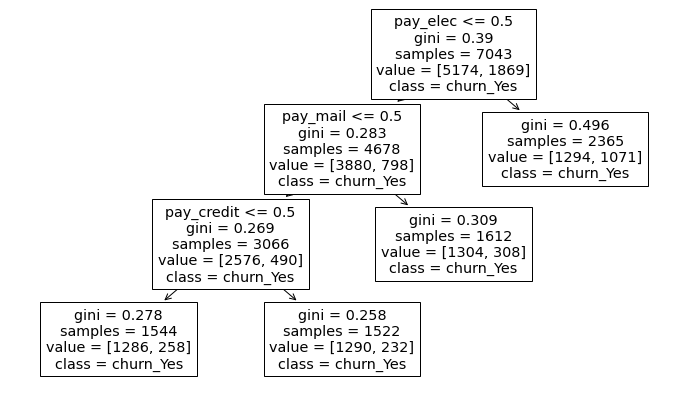

In [15]:
#visualize the decision tree
plt.figure(figsize=(12, 7))
plot_tree(tree, feature_names=x_train.columns, class_names=y_train.columns)
plt.show()

In [16]:
tree.score(x_train, y_train)

0.7346301292063041

In [17]:
#make predicions
y_pred = tree.predict(x_train)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [18]:
#print the classification report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85      5174
           1       0.00      0.00      0.00      1869

    accuracy                           0.73      7043
   macro avg       0.37      0.50      0.42      7043
weighted avg       0.54      0.73      0.62      7043



In [19]:
#evaluate the model with a confusion matrix
confusion_matrix(y_train, y_pred)

array([[5174,    0],
       [1869,    0]])

# Random Forest Exercises

##### 1. Continue working in your model file with titanic data to do the following:

- Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

- Evaluate your results using the model score, confusion matrix, and classification report.

- Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

- Run through steps increasing your min_samples_leaf and decreasing your max_depth.

- What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

In [2]:
#get the titanic dataset
df = get_titanic_data()
df.head()

Reading from csv file...


,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [3]:
#basic clean for the titanic dataset
df = df.drop(columns=['passenger_id', 'class', 'embarked', 'deck', 'age'])
dum_df = pd.get_dummies(df[['sex', 'embark_town']], drop_first = [True, True])
df = pd.concat([df, dum_df], axis = 1)
df.head()

,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,3,male,1,0,7.2500,Southampton,0,1,0,1
1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0
2,1,3,female,0,0,7.9250,Southampton,1,0,0,1
3,1,1,female,1,0,53.1000,Southampton,0,0,0,1
4,0,3,male,0,0,8.0500,Southampton,1,1,0,1


In [4]:
df.shape

(891, 11)

In [5]:
#split the data
train, test = train_test_split(df, train_size = 0.8, stratify = df.survived, random_state=123)
train, validate = train_test_split(train, train_size = 0.7, stratify = train.survived, random_state=123)
#verify the data split
train.shape, validate.shape, test.shape

((498, 11), (214, 11), (179, 11))

---

##### Random forest model 1 with 2 features - min leaf = 1 max depth = 10

In [6]:
#split the train set for x and y
x_train = train.drop(columns=['survived'])
y_train = train[['survived']]
x_train.head()

,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
583,1,male,0,0,40.1250,Cherbourg,1,1,0,0
165,3,male,0,2,20.5250,Southampton,0,1,0,1
50,3,male,4,1,39.6875,Southampton,0,1,0,1
259,2,female,0,1,26.0000,Southampton,0,0,0,1
306,1,female,0,0,110.8833,Cherbourg,1,0,0,0


In [7]:
y_train.head()

,survived
583,0
165,1
50,0
259,1
306,1


In [8]:
#select features to model
selected_features = ['pclass', 'sex_male']

In [9]:
#create a classifier object
clf = RandomForestClassifier(min_samples_leaf=1, max_depth=10, random_state=123)

In [10]:
#fit the classifier object with the train selected features and the train y values
clf.fit(x_train[selected_features], y_train.survived)

RandomForestClassifier(max_depth=10, random_state=123)

In [11]:
#use the trained model to predict survival based on the train dataset
y_train['y_pred'] = clf.predict(x_train[selected_features])
y_train.head()

,survived,y_pred
583,0,0
165,1,0
50,0,0
259,1,1
306,1,1


In [12]:
#evaluate the accuracy of the models predictions
accuracy_score(y_train.survived, y_train.y_pred)

0.7991967871485943

In [13]:
#evaluate the model with a classification report
pd.DataFrame(classification_report(y_train.survived, y_train.y_pred, output_dict=True)).transpose()

,precision,recall,f1-score,support
0,0.820433,0.863192,0.841270,307.000000
1,0.760000,0.696335,0.726776,191.000000
accuracy,0.799197,0.799197,0.799197,0.799197
macro avg,0.790217,0.779764,0.784023,498.000000
weighted avg,0.797255,0.799197,0.797358,498.000000


In [14]:
#view the crosstab of the train survived vs the train predicted to evaluate the tp, tn, fp, fn
pd.crosstab(y_train.survived, y_train.y_pred)

y_pred,0,1
survived,,
0,265,42
1,58,133


### Model 1 (max depth = 10) evaluation calculations
**Positive** = survived

- True positives: 133
- True negatives: 265
- False positives: 58
- False negatives: 42
- Model Accuracy: 79.92%
- Model precision: 76%
- Model recall: 69.63%
- Model f1: 72.68%
- Model support: 191

---

#### Random forest model 1 - min leaf at 3 and max depth at 5 - titanic dataset

In [15]:
#create a classifier object
clf = RandomForestClassifier(min_samples_leaf=3, max_depth=5, random_state=123)

In [16]:
#fit the classifier object with the train selected features and the train y values
clf.fit(x_train[selected_features], y_train.survived)

RandomForestClassifier(max_depth=5, min_samples_leaf=3, random_state=123)

In [17]:
#use the trained model to predict survival based on the train dataset
y_train['y_pred'] = clf.predict(x_train[selected_features])
y_train.head()

,survived,y_pred
583,0,0
165,1,0
50,0,0
259,1,1
306,1,1


In [18]:
#evaluate the accuracy of the models predictions
accuracy_score(y_train.survived, y_train.y_pred)

0.7991967871485943

In [19]:
#evaluate the model with a classification report
pd.DataFrame(classification_report(y_train.survived, y_train.y_pred, output_dict=True)).transpose()

,precision,recall,f1-score,support
0,0.820433,0.863192,0.841270,307.000000
1,0.760000,0.696335,0.726776,191.000000
accuracy,0.799197,0.799197,0.799197,0.799197
macro avg,0.790217,0.779764,0.784023,498.000000
weighted avg,0.797255,0.799197,0.797358,498.000000


In [20]:
#view the crosstab of the train survived vs the train predicted to evaluate the tp, tn, fp, fn
pd.crosstab(y_train.survived, y_train.y_pred)

y_pred,0,1
survived,,
0,265,42
1,58,133


##### Comparisons:
- As seen above with the decision tree exercises, when only two features are used small changes to the model do not yield much of a change to the models performance.
- With this model changing the min leaf and max depth values did not have an impact (did not change eval metrics) on the models performance

---

#### Random forest model 3 - titanic dataset

In [21]:
train.head()

,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
583,0,1,male,0,0,40.1250,Cherbourg,1,1,0,0
165,1,3,male,0,2,20.5250,Southampton,0,1,0,1
50,0,3,male,4,1,39.6875,Southampton,0,1,0,1
259,1,2,female,0,1,26.0000,Southampton,0,0,0,1
306,1,1,female,0,0,110.8833,Cherbourg,1,0,0,0


In [28]:
x_train = train.drop(columns=['sex', 'embark_town', 'survived'])
x_train.head()

,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
583,1,0,0,40.1250,1,1,0,0
165,3,0,2,20.5250,0,1,0,1
50,3,4,1,39.6875,0,1,0,1
259,2,0,1,26.0000,0,0,0,1
306,1,0,0,110.8833,1,0,0,0


In [29]:
#create a classifier object
clf = RandomForestClassifier(min_samples_leaf=1, max_depth=10, random_state=123)

In [30]:
#fit the classifier object with the train selected features and the train y values
clf.fit(x_train, y_train.survived)

RandomForestClassifier(max_depth=10, random_state=123)

In [31]:
#use the trained model to predict survival based on the train dataset
y_train['y_pred'] = clf.predict(x_train)
y_train.head()

,survived,y_pred
583,0,0
165,1,1
50,0,0
259,1,1
306,1,1


In [32]:
#evaluate the accuracy of the models predictions
accuracy_score(y_train.survived, y_train.y_pred)

0.9437751004016064

In [33]:
#evaluate the model with a classification report
pd.DataFrame(classification_report(y_train.survived, y_train.y_pred, output_dict=True)).transpose()

,precision,recall,f1-score,support
0,0.931889,0.980456,0.955556,307.000000
1,0.965714,0.884817,0.923497,191.000000
accuracy,0.943775,0.943775,0.943775,0.943775
macro avg,0.948801,0.932636,0.939526,498.000000
weighted avg,0.944862,0.943775,0.943260,498.000000


In [34]:
#view the crosstab of the train survived vs the train predicted to evaluate the tp, tn, fp, fn
pd.crosstab(y_train.survived, y_train.y_pred)

y_pred,0,1
survived,,
0,301,6
1,22,169


##### Re-run the random forest model with a change in min sample leaf and max depth (min leaf = 3, max depth = 5)

In [35]:
#create a classifier object
clf = RandomForestClassifier(min_samples_leaf=3, max_depth=5, random_state=123)

In [36]:
#fit the classifier object with the train selected features and the train y values
clf.fit(x_train, y_train.survived)

RandomForestClassifier(max_depth=5, min_samples_leaf=3, random_state=123)

In [37]:
#use the trained model to predict survival based on the train dataset
y_train['y_pred'] = clf.predict(x_train)
y_train.head()

,survived,y_pred
583,0,0
165,1,0
50,0,0
259,1,1
306,1,1


In [38]:
#evaluate the accuracy of the models predictions
accuracy_score(y_train.survived, y_train.y_pred)

0.8373493975903614

In [39]:
#evaluate the model with a classification report
pd.DataFrame(classification_report(y_train.survived, y_train.y_pred, output_dict=True)).transpose()

,precision,recall,f1-score,support
0,0.819209,0.944625,0.877458,307.000000
1,0.881944,0.664921,0.758209,191.000000
accuracy,0.837349,0.837349,0.837349,0.837349
macro avg,0.850577,0.804773,0.817834,498.000000
weighted avg,0.843270,0.837349,0.831722,498.000000


In [40]:
#view the crosstab of the train survived vs the train predicted to evaluate the tp, tn, fp, fn
pd.crosstab(y_train.survived, y_train.y_pred)

y_pred,0,1
survived,,
0,290,17
1,64,127


##### Comparisons:
- Since this model used more features, when the min sample leaf was increased to 3 and the max depth was decreased to 5 there was a notable decrease in performance of the model across all evaluation metrics.

---

## KNN Exercises

#### 1. Continue working in your model file with the titanic dataset.

- Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

- Evaluate your results using the model score, confusion matrix, and classification report.

- Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

- Run through steps 2-4 setting k to 10

- Run through setps 2-4 setting k to 20

- What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

- Which model performs best on our out-of-sample data from validate?

In [2]:
#get the Titanic dataset
df = get_titanic_data()
df.head()

Reading from csv file...


,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [3]:
#use prep function for initial data cleaning
df = prep_titanic(df)
df.head()

,survived,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,3,1,0,7.2500,0,1,0,1
1,1,1,1,0,71.2833,0,0,0,0
2,1,3,0,0,7.9250,1,0,0,1
3,1,1,1,0,53.1000,0,0,0,1
4,0,3,0,0,8.0500,1,1,0,1


In [4]:
#split the data
train, test = train_test_split(df, train_size = 0.8, stratify = df.survived, random_state=123)
train, validate = train_test_split(train, train_size = 0.7, stratify = train.survived, random_state=123)
#verify the data split
train.shape, validate.shape, test.shape

((498, 9), (214, 9), (179, 9))

___

#### KNN model: X = 'pclass', 'sex_male,  Y = 'survived', n_neighbors = 5

In [5]:
#assign variables for the x and y in the train dataset
x_train = train[['pclass', 'sex_male']]
y_train = train[['survived']]
x_train.head(), y_train.head()

(     pclass  sex_male
 583       1         1
 165       3         1
 50        3         1
 259       2         0
 306       1         0,
      survived
 583         0
 165         1
 50          0
 259         1
 306         1)

In [6]:
#make the knn model 
clf = KNN(n_neighbors=5)

In [7]:
#fit the model 
clf.fit(x_train, y_train)

KNeighborsClassifier()

In [8]:
#make predictions
y_pred = clf.predict(x_train)

In [9]:
#eval the model's accuracy
accuracy_score(y_train, y_pred)

0.7891566265060241

In [10]:
#evaluate the model with a classification report
pd.DataFrame(classification_report(y_train, y_pred, output_dict=True)).transpose()

,precision,recall,f1-score,support
0,0.750000,0.986971,0.852321,307.000000
1,0.957447,0.471204,0.631579,191.000000
accuracy,0.789157,0.789157,0.789157,0.789157
macro avg,0.853723,0.729087,0.741950,498.000000
weighted avg,0.829563,0.789157,0.767659,498.000000


---

#### KNN model: X = all except 'survived',  Y = 'survived', n_neighbors = 5

In [17]:
#assign variables for the x and y in the train dataset
x_train = train.drop(columns=['survived'])
y_train = train[['survived']]
x_train.head(), y_train.head()

(     pclass  sibsp  parch      fare  alone  sex_male  embark_town_Queenstown  \
 583       1      0      0   40.1250      1         1                       0   
 165       3      0      2   20.5250      0         1                       0   
 50        3      4      1   39.6875      0         1                       0   
 259       2      0      1   26.0000      0         0                       0   
 306       1      0      0  110.8833      1         0                       0   
 
      embark_town_Southampton  
 583                        0  
 165                        1  
 50                         1  
 259                        1  
 306                        0  ,
      survived
 583         0
 165         1
 50          0
 259         1
 306         1)

In [18]:
#make the knn model 
clf = KNN(n_neighbors=5)

In [19]:
#fit the model 
clf.fit(x_train, y_train)

KNeighborsClassifier()

In [20]:
#make predictions
y_pred = clf.predict(x_train)

In [21]:
#eval the model's accuracy
accuracy_score(y_train, y_pred)

0.8072289156626506

In [22]:
#evaluate the model with a classification report
pd.DataFrame(classification_report(y_train, y_pred, output_dict=True)).transpose()

,precision,recall,f1-score,support
0,0.830721,0.863192,0.846645,307.000000
1,0.765363,0.717277,0.740541,191.000000
accuracy,0.807229,0.807229,0.807229,0.807229
macro avg,0.798042,0.790235,0.793593,498.000000
weighted avg,0.805654,0.807229,0.805951,498.000000


In [23]:
#use the validate data to make predictions
x_val = validate.drop(columns=['survived'])
y_val = validate[['survived']]
x_val.head(), y_val.head()

(     pclass  sibsp  parch      fare  alone  sex_male  embark_town_Queenstown  \
 610       3      1      5   31.2750      0         0                       0   
 424       3      1      1   20.2125      0         1                       0   
 568       3      0      0    7.2292      1         1                       0   
 334       1      1      0  133.6500      0         0                       0   
 101       3      0      0    7.8958      1         1                       0   
 
      embark_town_Southampton  
 610                        1  
 424                        1  
 568                        0  
 334                        1  
 101                        1  ,
      survived
 610         0
 424         0
 568         0
 334         1
 101         0)

In [24]:
y_val_pred = clf.predict(x_val)

In [25]:
#look at the model's accuracy for the validate data
accuracy_score(y_val, y_val_pred)

0.7429906542056075

In [26]:
#evaluate the model with a classification report for the validate data
pd.DataFrame(classification_report(y_val, y_val_pred, output_dict=True)).transpose()

,precision,recall,f1-score,support
0,0.776978,0.818182,0.797048,132.000000
1,0.680000,0.621951,0.649682,82.000000
accuracy,0.742991,0.742991,0.742991,0.742991
macro avg,0.728489,0.720067,0.723365,214.000000
weighted avg,0.739818,0.742991,0.740580,214.000000


---

#### KNN model: X = all except 'survived',  Y = 'survived', n_neighbors = 10

In [30]:
#assign variables for the x and y in the train dataset
x_train = train.drop(columns=['survived'])
y_train = train[['survived']]
x_train.head(), y_train.head()

(     pclass  sibsp  parch      fare  alone  sex_male  embark_town_Queenstown  \
 583       1      0      0   40.1250      1         1                       0   
 165       3      0      2   20.5250      0         1                       0   
 50        3      4      1   39.6875      0         1                       0   
 259       2      0      1   26.0000      0         0                       0   
 306       1      0      0  110.8833      1         0                       0   
 
      embark_town_Southampton  
 583                        0  
 165                        1  
 50                         1  
 259                        1  
 306                        0  ,
      survived
 583         0
 165         1
 50          0
 259         1
 306         1)

In [31]:
#make the knn model 
clf = KNN(n_neighbors=10)

In [32]:
#fit the model 
clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [33]:
#make predictions
y_pred = clf.predict(x_train)

In [34]:
#eval the model's accuracy
accuracy_score(y_train, y_pred)

0.7831325301204819

In [35]:
#evaluate the model with a classification report
pd.DataFrame(classification_report(y_train, y_pred, output_dict=True)).transpose()

,precision,recall,f1-score,support
0,0.797015,0.869707,0.831776,307.000000
1,0.754601,0.643979,0.694915,191.000000
accuracy,0.783133,0.783133,0.783133,0.783133
macro avg,0.775808,0.756843,0.763345,498.000000
weighted avg,0.780748,0.783133,0.779285,498.000000


In [36]:
#use the validate data to make predictions
x_val = validate.drop(columns=['survived'])
y_val = validate[['survived']]
x_val.head(), y_val.head()

(     pclass  sibsp  parch      fare  alone  sex_male  embark_town_Queenstown  \
 610       3      1      5   31.2750      0         0                       0   
 424       3      1      1   20.2125      0         1                       0   
 568       3      0      0    7.2292      1         1                       0   
 334       1      1      0  133.6500      0         0                       0   
 101       3      0      0    7.8958      1         1                       0   
 
      embark_town_Southampton  
 610                        1  
 424                        1  
 568                        0  
 334                        1  
 101                        1  ,
      survived
 610         0
 424         0
 568         0
 334         1
 101         0)

In [37]:
y_val_pred = clf.predict(x_val)

In [38]:
#look at the model's accuracy for the validate data
accuracy_score(y_val, y_val_pred)

0.7149532710280374

In [39]:
#evaluate the model with a classification report for the validate data
pd.DataFrame(classification_report(y_val, y_val_pred, output_dict=True)).transpose()

,precision,recall,f1-score,support
0,0.748252,0.810606,0.778182,132.000000
1,0.647887,0.560976,0.601307,82.000000
accuracy,0.714953,0.714953,0.714953,0.714953
macro avg,0.698070,0.685791,0.689745,214.000000
weighted avg,0.709794,0.714953,0.710407,214.000000


---

#### KNN model: X = all except 'survived',  Y = 'survived', n_neighbors = 20

In [43]:
#assign variables for the x and y in the train dataset
x_train = train.drop(columns=['survived'])
y_train = train[['survived']]
x_train.head(), y_train.head()

(     pclass  sibsp  parch      fare  alone  sex_male  embark_town_Queenstown  \
 583       1      0      0   40.1250      1         1                       0   
 165       3      0      2   20.5250      0         1                       0   
 50        3      4      1   39.6875      0         1                       0   
 259       2      0      1   26.0000      0         0                       0   
 306       1      0      0  110.8833      1         0                       0   
 
      embark_town_Southampton  
 583                        0  
 165                        1  
 50                         1  
 259                        1  
 306                        0  ,
      survived
 583         0
 165         1
 50          0
 259         1
 306         1)

In [44]:
#make the knn model 
clf = KNN(n_neighbors=20)

In [45]:
#fit the model 
clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [46]:
#make predictions
y_pred = clf.predict(x_train)

In [47]:
#eval the model's accuracy
accuracy_score(y_train, y_pred)

0.7369477911646586

In [48]:
#evaluate the model with a classification report
pd.DataFrame(classification_report(y_train, y_pred, output_dict=True)).transpose()

,precision,recall,f1-score,support
0,0.751429,0.856678,0.800609,307.000000
1,0.702703,0.544503,0.613569,191.000000
accuracy,0.736948,0.736948,0.736948,0.736948
macro avg,0.727066,0.700590,0.707089,498.000000
weighted avg,0.732741,0.736948,0.728873,498.000000


In [49]:
#use the validate data to make predictions
x_val = validate.drop(columns=['survived'])
y_val = validate[['survived']]
x_val.head(), y_val.head()

(     pclass  sibsp  parch      fare  alone  sex_male  embark_town_Queenstown  \
 610       3      1      5   31.2750      0         0                       0   
 424       3      1      1   20.2125      0         1                       0   
 568       3      0      0    7.2292      1         1                       0   
 334       1      1      0  133.6500      0         0                       0   
 101       3      0      0    7.8958      1         1                       0   
 
      embark_town_Southampton  
 610                        1  
 424                        1  
 568                        0  
 334                        1  
 101                        1  ,
      survived
 610         0
 424         0
 568         0
 334         1
 101         0)

In [50]:
y_val_pred = clf.predict(x_val)

In [51]:
#look at the model's accuracy for the validate data
accuracy_score(y_val, y_val_pred)

0.6728971962616822

In [52]:
#evaluate the model with a classification report for the validate data
pd.DataFrame(classification_report(y_val, y_val_pred, output_dict=True)).transpose()

,precision,recall,f1-score,support
0,0.706667,0.803030,0.751773,132.000000
1,0.593750,0.463415,0.520548,82.000000
accuracy,0.672897,0.672897,0.672897,0.672897
macro avg,0.650208,0.633222,0.636160,214.000000
weighted avg,0.663400,0.672897,0.663173,214.000000


#### Model Comparisons:

- As the n_neighbors value increased the accuracy of the model decreased when using the same feature imputs
- while the overall model accuracy decreased the drop off when evaluating with the validate data was about the same across the different n_neighbor values


---

## Logistic Regression Exercises

In these exercises, we'll continue working with the titanic dataset and building logistic regression models.

For all of the models you create, choose a threshold that optimizes for accuracy.

- Create a model that includes age in addition to fare and pclass. Does this model perform better than your baseline?

- Include sex in your model as well. Note that you'll need to encode or create a dummy variable of this feature before including it in a model.

- Try out other combinations of features and models.

- Use you best 3 models to predict and evaluate on your validate sample.

- Choose you best model from the validation performation, and evaluate it on the test dataset. How do the performance metrics compare to validate? to train?

In [3]:
#get the Titanic dataset
df = get_titanic_data()
df.head()

Reading from csv file...


,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [4]:
#check the count of null values by column
df.isnull().sum()

passenger_id      0
survived          0
pclass            0
sex               0
age             177
sibsp             0
parch             0
fare              0
embarked          2
class             0
deck            688
embark_town       2
alone             0
dtype: int64

In [53]:
#use prep function for initial data cleaning
#df = prep_titanic(df)
#df.head()

In [5]:
#modified data cleaning function to keep the age column, to fill nulls in the embark_town column, 
#and to remove rows with null age entries
def prep_titanic(df):
    '''
    takes in a dataframe and returns a cleaned dataframe 
    with unnecesary and duplicate columns removed 
    and categorical columns encoded
    '''
    drop_columns = ['passenger_id', 'class', 'embarked', 'deck']
    df = df.drop(columns = drop_columns)
    df['embark_town'] = df.embark_town.fillna('Southampton')
    df = df.dropna()
    dum_df = pd.get_dummies(df[['sex', 'embark_town']], drop_first = [True, True])
    df = pd.concat([df, dum_df], axis = 1)
    return df.drop(columns = ['sex', 'embark_town'])

In [6]:
#reassign the df to the cleaned df
df = prep_titanic(df)

In [7]:
df.shape


(714, 10)

In [8]:
#view the cleaned df
df.head()

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,3,22.0,1,0,7.2500,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,1,0,1


In [9]:
#check that null values were removed
df.isnull().sum()

survived                   0
pclass                     0
age                        0
sibsp                      0
parch                      0
fare                       0
alone                      0
sex_male                   0
embark_town_Queenstown     0
embark_town_Southampton    0
dtype: int64

In [10]:
#split the data
train, test = train_test_split(df, train_size = 0.8, stratify = df.survived, random_state=123)
train, validate = train_test_split(train, train_size = 0.7, stratify = train.survived, random_state=123)
#verify the data split
train.shape, validate.shape, test.shape

((399, 10), (172, 10), (143, 10))

---

#### Evaluate a baseline for the dataset

In [11]:
#assign y_train variable
y_train = train[['survived']]
y_train.head()

,survived
652,0
813,0
194,1
417,1
460,1


In [12]:
#add a baseline column to the y_train dataframe to evaluate a baseline accuracy 
#with the most common value in the original column
y_train['baseline'] = 0
y_train.head()

,survived,baseline
652,0,0
813,0,0
194,1,0
417,1,0
460,1,0


In [13]:
#calculate a baseline accuracy score
accuracy_score(y_train.survived, y_train.baseline)

0.5939849624060151

In [14]:
y_train = y_train.drop(columns=['baseline'])
y_train.head()

,survived
652,0
813,0
194,1
417,1
460,1


---

#### Logistical Regression Model 1: X = ('age', 'fare', 'pclass'), y = 'survived'

In [15]:
x_train = train[['age', 'fare', 'pclass']]
x_train.head()

,age,fare,pclass
652,21.0,8.4333,3
813,6.0,31.2750,3
194,44.0,27.7208,1
417,18.0,13.0000,2
460,48.0,26.5500,1


In [16]:
#create the logistical regression model
logit1 = LogisticRegression(C=1, random_state=123)

In [17]:
#train the model with the selected columns from the train dataset
logit1.fit(x_train, y_train)

LogisticRegression(C=1, random_state=123)

In [18]:
#make predictions with the trained model
y_pred = logit1.predict(x_train)

In [19]:
#review the predictions
y_pred

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,

In [20]:
#calculate the accuracy score of the model
accuracy_score(y_train, y_pred)

0.6992481203007519

In [21]:
#review the performance of the log r model with a classification report
pd.DataFrame(classification_report(y_train, y_pred, output_dict=True)).transpose()

,precision,recall,f1-score,support
0,0.715867,0.818565,0.763780,237.000000
1,0.664062,0.524691,0.586207,162.000000
accuracy,0.699248,0.699248,0.699248,0.699248
macro avg,0.689965,0.671628,0.674993,399.000000
weighted avg,0.694834,0.699248,0.691682,399.000000


#### Model performance comparison
- the model performed better than baseline
- model accuracy score = 0.6992
- baseline accuracy score = 0.5939

---

#### Logistic Regression Model 2 
- adding the 'sex_male' column to the features from model 1

In [22]:
#create the x variable from the train dataset
x_train2 = train[['age', 'fare', 'pclass', 'sex_male']]
x_train2.head()

,age,fare,pclass,sex_male
652,21.0,8.4333,3,1
813,6.0,31.2750,3,0
194,44.0,27.7208,1,0
417,18.0,13.0000,2,0
460,48.0,26.5500,1,1


In [23]:
#create the logistical regression model
logit2 = LogisticRegression(C=1, random_state=123)

In [24]:
#train the model with the selected columns from the train dataset
logit2.fit(x_train2, y_train)

LogisticRegression(C=1, random_state=123)

In [25]:
#make predictions with the trained model
y_pred2 = logit2.predict(x_train2)

In [26]:
#review the predictions
y_pred2

array([0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,

In [27]:
#calculate the accuracy score of the model
accuracy_score(y_train, y_pred2)

0.7869674185463659

In [28]:
#review the performance of the log r model with a classification report
pd.DataFrame(classification_report(y_train, y_pred2, output_dict=True)).transpose()

,precision,recall,f1-score,support
0,0.806452,0.843882,0.824742,237.000000
1,0.754967,0.703704,0.728435,162.000000
accuracy,0.786967,0.786967,0.786967,0.786967
macro avg,0.780709,0.773793,0.776588,399.000000
weighted avg,0.785548,0.786967,0.785640,399.000000


#### Model 2 comparison
- model 2 (which added the 'sex' column) performed better than both model 1 and baseline with an accuracy score of 0.7869

---

#### Logistical Regression Model 3
- x = all features except 'survived' (y var)

In [29]:
#create the x variable from the train dataset
x_train3 = train.drop(columns=['survived'])
x_train3.head()

,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
652,3,21.0,0,0,8.4333,1,1,0,1
813,3,6.0,4,2,31.2750,0,0,0,1
194,1,44.0,0,0,27.7208,1,0,0,0
417,2,18.0,0,2,13.0000,0,0,0,1
460,1,48.0,0,0,26.5500,1,1,0,1


In [30]:
#create the logistical regression model
logit3 = LogisticRegression(C=1, random_state=123)

In [31]:
#train the model with the selected columns from the train dataset
logit3.fit(x_train3, y_train)

LogisticRegression(C=1, random_state=123)

In [32]:
#make predictions with the trained model
y_pred3 = logit3.predict(x_train3)

In [33]:
#review the predictions
y_pred3

array([0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,

In [34]:
#calculate the accuracy score of the model
accuracy_score(y_train, y_pred3)

0.8020050125313283

In [35]:
#review the performance of the log r model with a classification report
pd.DataFrame(classification_report(y_train, y_pred3, output_dict=True)).transpose()

,precision,recall,f1-score,support
0,0.813492,0.864979,0.838446,237.000000
1,0.782313,0.709877,0.744337,162.000000
accuracy,0.802005,0.802005,0.802005,0.802005
macro avg,0.797902,0.787428,0.791391,399.000000
weighted avg,0.800833,0.802005,0.800236,399.000000


#### Model 3 comparison:
- model 3 which used all features except 'survived' performed slightly better than model 2 and notable better than model 1 and baseline with an accuracy score of 0.8020

In [36]:
print('Logistical Regression Model Accuracy Comparison - Titanic "Train" Dataset')
print('====================================')
print(f'Model 1 accuracy: {accuracy_score(y_train, y_pred)}')
print(f'Model 2 accuracy: {accuracy_score(y_train, y_pred2)}')
print(f'Model 3 accuracy: {accuracy_score(y_train, y_pred3)}')

Logistical Regression Model Accuracy Comparison - Titanic "Train" Dataset
Model 1 accuracy: 0.6992481203007519
Model 2 accuracy: 0.7869674185463659
Model 3 accuracy: 0.8020050125313283


----

#### Run the above models with the validate dataset

#### Model 1 with validate data

In [40]:
#y_val for validate data
y_val = validate[['survived']]
y_val.head()

,survived
279,1
328,1
701,1
503,0
261,1


In [37]:
#x_val with same features as x_train
x_val = validate[['age', 'fare', 'pclass']]
x_val.head()

,age,fare,pclass
279,35.0,20.2500,3
328,31.0,20.5250,3
701,35.0,26.2875,1
503,37.0,9.5875,3
261,3.0,31.3875,3


In [39]:
#make predictions
y_val_pred = logit1.predict(x_val)
y_val_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0])

In [41]:
#accuracy score for model 1 on validate data
accuracy_score(y_val, y_val_pred)

0.6918604651162791

In [42]:
#classification report for model 1 validate data
pd.DataFrame(classification_report(y_val, y_val_pred, output_dict=True)).transpose()

,precision,recall,f1-score,support
0,0.709402,0.813725,0.757991,102.00000
1,0.654545,0.514286,0.576000,70.00000
accuracy,0.691860,0.691860,0.691860,0.69186
macro avg,0.681974,0.664006,0.666995,172.00000
weighted avg,0.687076,0.691860,0.683925,172.00000


---

#### Model 2 with validate data

In [43]:
#create the x variable from the validate dataset to match model 2 calls
x_val2 = validate[['age', 'fare', 'pclass', 'sex_male']]
x_val2.head()

,age,fare,pclass,sex_male
279,35.0,20.2500,3,0
328,31.0,20.5250,3,0
701,35.0,26.2875,1,1
503,37.0,9.5875,3,0
261,3.0,31.3875,3,1


In [45]:
#make predictions
y_val_pred2 = logit2.predict(x_val2)
y_val_pred2

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0])

In [46]:
#accuracy score for model 2 on validate data
accuracy_score(y_val, y_val_pred2)

0.7674418604651163

In [47]:
#classification report for model 2 validate data
pd.DataFrame(classification_report(y_val, y_val_pred2, output_dict=True)).transpose()

,precision,recall,f1-score,support
0,0.781818,0.843137,0.811321,102.000000
1,0.741935,0.657143,0.696970,70.000000
accuracy,0.767442,0.767442,0.767442,0.767442
macro avg,0.761877,0.750140,0.754145,172.000000
weighted avg,0.765587,0.767442,0.764783,172.000000


---

#### Model 3 with validate data

In [48]:
#create the x variable from the validate dataset to match model 3 calls
x_val3 = validate.drop(columns=['survived'])
x_val3.head()

,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
279,3,35.0,1,1,20.2500,0,0,0,1
328,3,31.0,1,1,20.5250,0,0,0,1
701,1,35.0,0,0,26.2875,1,1,0,1
503,3,37.0,0,0,9.5875,1,0,0,1
261,3,3.0,4,2,31.3875,0,1,0,1


In [49]:
#make predictions with the trained model
y_val_pred3 = logit3.predict(x_val3)
y_val_pred3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0])

In [50]:
#accuracy score for model 3 on validate data
accuracy_score(y_val, y_val_pred3)

0.7616279069767442

In [51]:
#classification report for model 3 validate data
pd.DataFrame(classification_report(y_val, y_val_pred3, output_dict=True)).transpose()

,precision,recall,f1-score,support
0,0.769912,0.852941,0.809302,102.000000
1,0.745763,0.628571,0.682171,70.000000
accuracy,0.761628,0.761628,0.761628,0.761628
macro avg,0.757837,0.740756,0.745736,172.000000
weighted avg,0.760084,0.761628,0.757563,172.000000


In [53]:
#compare the models performance with the train data and with the validate data
print('Logistical Regression Model Accuracy Comparison - Titanic "Train" Dataset')
print('=========================================')
print(f'Model 1 train accuracy: {accuracy_score(y_train, y_pred)}')
print(f'Model 2 train accuracy: {accuracy_score(y_train, y_pred2)}')
print(f'Model 3 train accuracy: {accuracy_score(y_train, y_pred3)}')
print('-----------------------------------------')
print('Logistical Regression Model Accuracy Comparison - Titanic "Validate" Dataset')
print('=========================================')
print(f'Model 1 val accuracy: {accuracy_score(y_val, y_val_pred)}')
print(f'Model 2 val accuracy: {accuracy_score(y_val, y_val_pred2)}')
print(f'Model 3 val accuracy: {accuracy_score(y_val, y_val_pred3)}')


Logistical Regression Model Accuracy Comparison - Titanic "Train" Dataset
Model 1 train accuracy: 0.6992481203007519
Model 2 train accuracy: 0.7869674185463659
Model 3 train accuracy: 0.8020050125313283
-----------------------------------------
Logistical Regression Model Accuracy Comparison - Titanic "Validate" Dataset
Model 1 val accuracy: 0.6918604651162791
Model 2 val accuracy: 0.7674418604651163
Model 3 val accuracy: 0.7616279069767442


#### Model 2 had the best performance on validate data and the second least dropoff in performance compared to performance on the train dataset

---

#### Run model 2 with the test data

In [55]:
#create the y_test varable
y_test = test[['survived']]
y_test.head()

,survived
687,0
387,1
153,0
496,1
84,1


In [54]:
#create the x variable from the test dataset to match model 2 calls
x_test = test[['age', 'fare', 'pclass', 'sex_male']]
x_test.head()

,age,fare,pclass,sex_male
687,19.0,10.1708,3,1
387,36.0,13.0000,2,0
153,40.5,14.5000,3,1
496,54.0,78.2667,1,0
84,17.0,10.5000,2,0


In [56]:
#make predictions
y_test_pred = logit2.predict(x_test)
y_test_pred

array([0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1])

In [57]:
#accuracy score for model 2 on test data
accuracy_score(y_test, y_test_pred)

0.8251748251748252

In [58]:
#classification report for model 2 validate data
pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True)).transpose()

,precision,recall,f1-score,support
0,0.865854,0.835294,0.850299,85.000000
1,0.770492,0.810345,0.789916,58.000000
accuracy,0.825175,0.825175,0.825175,0.825175
macro avg,0.818173,0.822819,0.820108,143.000000
weighted avg,0.827175,0.825175,0.825808,143.000000


#### Model 2 performed better on the test data than any of the models on the train or validate data

In [59]:
#compare the models performance with the train data, with the validate data, and with the test data on model 2
print('Logistical Regression Model Accuracy Comparison - Titanic "Train" Dataset')
print('=========================================')
print(f'Model 1 train accuracy: {accuracy_score(y_train, y_pred)}')
print(f'Model 2 train accuracy: {accuracy_score(y_train, y_pred2)}')
print(f'Model 3 train accuracy: {accuracy_score(y_train, y_pred3)}')
print('-----------------------------------------')
print('Logistical Regression Model Accuracy Comparison - Titanic "Validate" Dataset')
print('=========================================')
print(f'Model 1 val accuracy: {accuracy_score(y_val, y_val_pred)}')
print(f'Model 2 val accuracy: {accuracy_score(y_val, y_val_pred2)}')
print(f'Model 3 val accuracy: {accuracy_score(y_val, y_val_pred3)}')
print('-----------------------------------------')
print('Logistical Regression Model Accuracy Comparison - Titanic "Test" Dataset on Model 2')
print('=========================================')
print(f'Model 2 test accuracy: {accuracy_score(y_test, y_test_pred)}')

Logistical Regression Model Accuracy Comparison - Titanic "Train" Dataset
Model 1 train accuracy: 0.6992481203007519
Model 2 train accuracy: 0.7869674185463659
Model 3 train accuracy: 0.8020050125313283
-----------------------------------------
Logistical Regression Model Accuracy Comparison - Titanic "Validate" Dataset
Model 1 val accuracy: 0.6918604651162791
Model 2 val accuracy: 0.7674418604651163
Model 3 val accuracy: 0.7616279069767442
-----------------------------------------
Logistical Regression Model Accuracy Comparison - Titanic "Test" Dataset on Model 2
Model 2 test accuracy: 0.8251748251748252
